In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics, linear_model, model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from scipy.stats import chi2_contingency
from scipy.stats import chisquare
from scipy.stats import fisher_exact


In [2]:
# Read the CSV file
url = 'https://raw.githubusercontent.com/iatecookies/BachelorThesis/main/survey.csv'
df = pd.read_csv(filepath_or_buffer=url, header=0, index_col=0)

# PREPROCESSING

# Remove the first two rows
df = df.iloc[3:]

# index of dataframe represents a start date. Replaced with sequantial numeric index
df.reset_index(drop=True, inplace=True)

df.head()


#print(df.info())

# data_types = df.dtypes
# print(data_types)

,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,...,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23
0,2023-06-27 05:43:53,IP Address,94.63.88.205,100,162,True,2023-06-27 05:43:53,R_2qqiiUIZB7C86i1,NaN,NaN,...,Scenario 1,Male,35-44 years old,Portugal,City,Bachelor's degree,Working full-time,Walking,NaN,5de78fbbd7b2a0000bc2df59
1,2023-06-27 05:44:10,IP Address,146.198.45.107,100,189,True,2023-06-27 05:44:11,R_3FUTMLBYBJ8JME3,NaN,NaN,...,Scenario 1,Male,35-44 years old,United Kingdom of Great Britain and Northern I...,Rural,Bachelor's degree,Working full-time,Car,NaN,5c6ddaefdf677d00013fa313
2,2023-06-27 05:44:37,IP Address,163.158.111.63,100,125,True,2023-06-27 05:44:38,R_1pF4y9jkmvjeoBP,NaN,NaN,...,Scenario 1,Female,25-34 years old,Netherlands,City,Bachelor's degree,Working full-time,Car,NaN,60216ae272e775127f1ecd1f
3,2023-06-27 05:45:19,IP Address,82.26.181.154,100,213,True,2023-06-27 05:45:20,R_32VElPHHT1qpL7w,NaN,NaN,...,Scenario 1,Female,18-24 years old,United Kingdom of Great Britain and Northern I...,City,High school diploma or equivalent,Student,"Public transportation (bus, train, subway, etc)",I picked what was most pleasant for me,5df119cae3cc5b012d81f64b
4,2023-06-27 05:46:20,IP Address,95.108.58.252,100,166,True,2023-06-27 05:46:21,R_1gzkDAWpa1ZtqQ0,NaN,NaN,...,Scenario 1,Male,18-24 years old,Poland,City,Bachelor's degree,Working part-time,"Public transportation (bus, train, subway, etc)",NaN,5ea9c1f55ce96d106af147a7


In [40]:
# Only question 1

# df_question1 = df.iloc[:, 16: 17]

# # Create a new dataset with Factor1, Factor2, Factor3, and Target Question (Q1)
# new_dataset = pd.DataFrame(columns=['Factor1', 'Factor2', 'Factor3', 'Target_Question'])

# # new dataset starts as object with datatype per default
# new_dataset['Factor1'] = new_dataset['Factor1'].astype(int)
# new_dataset['Factor2'] = new_dataset['Factor2'].astype(int)
# new_dataset['Factor3'] = new_dataset['Factor3'].astype(int)
# new_dataset['Target_Question'] = new_dataset['Target_Question'].astype(int)

# # Iterate over each row in the original dataset
# for index, row in df_question1.iterrows():
    
#     if row.item() == 'Scenario 1':

#         #Map scenario A to 0 and scenario B to 1
#         new_row = {'Factor1': 0, 'Factor2': 1, 'Factor3': 0, 'Target_Question': 0}
#     else:
#         new_row = {'Factor1': 0, 'Factor2': 0, 'Factor3': 0, 'Target_Question': 1}
#     new_dataset = new_dataset.append(new_row, ignore_index=True)
    
#print(new_dataset)

#print(new_dataset.info())


In [210]:
# Only question 1

# X = new_dataset[['Factor1', 'Factor2', 'Factor3']]
# y = new_dataset['Target_Question']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the multinomial logistic regression model
# model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# # Fit the model on the training data
# model.fit(X_train, y_train)

# # Predict the target variable for the test data
# y_pred = model.predict(X_test)

# # Evaluate the model
# accuracy = model.score(X_test, y_test)
# print("Accuracy:", accuracy)

In [3]:
# Now for all the questions

scenario_rows = {
    1: {'Scenario 1': {'Factor1': 0, 'Factor2': 1, 'Factor3': 0, 'Target_Question': 0},
        'Scenario 2': {'Factor1': 0, 'Factor2': 0, 'Factor3': 0, 'Target_Question': 1}},
    2: {'Scenario 1': {'Factor1': 0, 'Factor2': 0, 'Factor3': 0, 'Target_Question': 0},
        'Scenario 2': {'Factor1': 0, 'Factor2': 1, 'Factor3': 1, 'Target_Question': 1}},
    3: {'Scenario 1': {'Factor1': 0, 'Factor2': 1, 'Factor3': 0, 'Target_Question': 0},
        'Scenario 2': {'Factor1': 1, 'Factor2': 0, 'Factor3': 0, 'Target_Question': 1}},
    4: {'Scenario 1': {'Factor1': 0, 'Factor2': 1, 'Factor3': 1, 'Target_Question': 0},
        'Scenario 2': {'Factor1': 0, 'Factor2': 0, 'Factor3': 0, 'Target_Question': 1}},
    5: {'Scenario 1': {'Factor1': 1, 'Factor2': 0, 'Factor3': 0, 'Target_Question': 0},
        'Scenario 2': {'Factor1': 0, 'Factor2': 0, 'Factor3': 0, 'Target_Question': 1}},
    6: {'Scenario 1': {'Factor1': 0, 'Factor2': 0, 'Factor3': 1, 'Target_Question': 0},
        'Scenario 2': {'Factor1': 0, 'Factor2': 0, 'Factor3': 0, 'Target_Question': 1}},
    7: {'Scenario 1': {'Factor1': 1, 'Factor2': 1, 'Factor3': 1, 'Target_Question': 0},
        'Scenario 2': {'Factor1': 0, 'Factor2': 0, 'Factor3': 0, 'Target_Question': 1}},
    8: {'Scenario 1': {'Factor1': 0, 'Factor2': 0, 'Factor3': 1, 'Target_Question': 0},
        'Scenario 2': {'Factor1': 0, 'Factor2': 1, 'Factor3': 0, 'Target_Question': 1}},
    9: {'Scenario 1': {'Factor1': 0, 'Factor2': 0, 'Factor3': 0, 'Target_Question': 0},
        'Scenario 2': {'Factor1': 0, 'Factor2': 0, 'Factor3': 1, 'Target_Question': 1}},
    10: {'Scenario 1': {'Factor1': 1, 'Factor2': 1, 'Factor3': 0, 'Target_Question': 0},
        'Scenario 2': {'Factor1': 0, 'Factor2': 0, 'Factor3': 0, 'Target_Question': 1}},
    11: {'Scenario 1': {'Factor1': 1, 'Factor2': 0, 'Factor3': 0, 'Target_Question': 0},
        'Scenario 2': {'Factor1': 0, 'Factor2': 0, 'Factor3': 1, 'Target_Question': 1}},
    12: {'Scenario 1': {'Factor1': 0, 'Factor2': 0, 'Factor3': 0, 'Target_Question': 0},
        'Scenario 2': {'Factor1': 1, 'Factor2': 0, 'Factor3': 0, 'Target_Question': 1}},
    13: {'Scenario 1': {'Factor1': 0, 'Factor2': 1, 'Factor3': 0, 'Target_Question': 0},
        'Scenario 2': {'Factor1': 0, 'Factor2': 0, 'Factor3': 0, 'Target_Question': 1}},
    14: {'Scenario 1': {'Factor1': 1, 'Factor2': 1, 'Factor3': 1, 'Target_Question': 0},
        'Scenario 2': {'Factor1': 0, 'Factor2': 0, 'Factor3': 0, 'Target_Question': 1}},
}


for i in range (1, 15):
    
    try: 
        
        df_question = df.iloc[:, 15+i: 16+i]
        print("Question", i )
        #print(df_question)

        # Create a new dataset with Factor1, Factor2, Factor3, and Target Question (Q1)
        new_dataset = pd.DataFrame(columns=['Factor1', 'Factor2', 'Factor3', 'Target_Question'])

        # new dataset starts as object with datatype per default
        new_dataset['Factor1'] = new_dataset['Factor1'].astype(int)
        new_dataset['Factor2'] = new_dataset['Factor2'].astype(int)
        new_dataset['Factor3'] = new_dataset['Factor3'].astype(int)
        new_dataset['Target_Question'] = new_dataset['Target_Question'].astype(int)


        # Iterate over each row in the original dataset
        for index, row in df_question.iterrows():

            scenario = row.item()

            new_row = scenario_rows[i][scenario]

            new_dataset = new_dataset.append(new_row, ignore_index=True)
            

        #print(new_dataset)
        
        X = new_dataset[['Factor1', 'Factor2', 'Factor3']]
        y = new_dataset['Target_Question']

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Initialize the multinomial logistic regression model
        model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

        # Fit the model on the training data
        model.fit(X_train, y_train)

        # Predict the target variable for the test data
        y_pred = model.predict(X_test)
        

        # Evaluate the model
        accuracy = model.score(X_test, y_test)
        print("Mean accuracy:", accuracy)
        #accuracies.append(accuracy)
        
        prob = model.predict_proba(X_test)
        print("Mean predicted probabilities of each class of the target variable:", np.mean(prob, axis= 0))
        print("Standard deviation:", np.std(prob, axis= 0))
        
        print()
        
        #Compare the predicted labels to the true labels and use one of the measures to quantify how well the model is doing.
        print(sklearn.metrics.classification_report(y_test, y_pred))
        print(pd.crosstab(y_test, y_pred, rownames=['ACTUAL'], colnames=['PREDICTED'], margins=True))
        
        print()
        print()
    except ValueError as err:
        print(err)

Question 1
Mean accuracy: 1.0
Mean predicted probabilities of each class of the target variable: [0.9637486 0.0362514]
Standard deviation: [0. 0.]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

PREDICTED  0  All
ACTUAL           
0          6    6
All        6    6


Question 2
This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1
Question 3
Mean accuracy: 1.0
Mean predicted probabilities of each class of the target variable: [0.95462742 0.04537258]
Standard deviation: [1.11022302e-16 0.00000000e+00]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
w


## Chi-squared  test


use chi-squared test to analyze whether changes in factor(s) have a significant impact on participants’ choice



In [58]:
# Read the CSV file
url = 'https://raw.githubusercontent.com/iatecookies/BachelorThesis/main/survey.csv'
df = pd.read_csv(filepath_or_buffer=url, header=0, index_col=0)

# PREPROCESSING

# Remove the first two rows
df = df.iloc[3:]

# index of dataframe represents a start date. Replaced with sequantial numeric index
df.reset_index(drop=True, inplace=True)

df.head()

data_types = df.dtypes
#print(data_types)

In [59]:
# Initialize an empty list to store the p-values
p_values_matrix = []


for i in range (16, 30):
    p_values_row = []  # Initialize an empty list to store p-values for the current row 
    for j in range(16, 30):

#         if (i != j):
            
        column_name = df.columns[i]
        column_name2 = df.columns[j]
        print(column_name, column_name2)

        # Convert columns to 'category' data type
        df[column_name] = df[column_name].astype('category')
        df[column_name2] = df[column_name2].astype('category')


        #Step 4: Perform the chi-squared test
        contingency_table = pd.crosstab(df.iloc[:,i],df.iloc[:,j] )

        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        
        
        print(contingency_table)
        print(chi2, p_value, dof, expected)
        # Store the p-value in the row list
        p_values_row.append(p_value)

        # Interpret the results
        print("Chi-squared test statistics:", chi2)

        alpha = 0.05

        print("P-value:", p_value)

        if p_value <= alpha:
            print('Dependent (reject H0)')
        else:
            print('Independent (H0 holds true)')
        print("Degrees of freedom:", dof)
        print()
        print()
#         else:
#             p_value = 0
#             p_values_row.append(p_value)
    # Append the row list to the p_values_matrix
    p_values_matrix.append(p_values_row)
    
    


Q1 Q1
Q1          Scenario 1  Scenario 2
Q1                                
Scenario 1          29           0
Scenario 2           0           1
6.991676575505352 0.008188961276439782 1 [[28.03333333  0.96666667]
 [ 0.96666667  0.03333333]]
Chi-squared test statistics: 6.991676575505352
P-value: 0.008188961276439782
Dependent (reject H0)
Degrees of freedom: 1


Q1 Q2
Q2          Scenario 1  Scenario 2
Q1                                
Scenario 1           1          28
Scenario 2           0           1
6.991676575505352 0.008188961276439782 1 [[ 0.96666667 28.03333333]
 [ 0.03333333  0.96666667]]
Chi-squared test statistics: 6.991676575505352
P-value: 0.008188961276439782
Dependent (reject H0)
Degrees of freedom: 1


Q1 Q3
Q3          Scenario 1  Scenario 2
Q1                                
Scenario 1          26           3
Scenario 2           1           0
1.8390804597701151 0.17505876122872865 1 [[26.1  2.9]
 [ 0.9  0.1]]
Chi-squared test statistics: 1.8390804597701151
P-value:

Q5          Scenario 1  Scenario 2
Q3                                
Scenario 1          26           1
Scenario 2           3           0
1.8390804597701151 0.17505876122872865 1 [[26.1  0.9]
 [ 2.9  0.1]]
Chi-squared test statistics: 1.8390804597701151
P-value: 0.17505876122872865
Independent (H0 holds true)
Degrees of freedom: 1


Q3 Q6
Q6          Scenario 1
Q3                    
Scenario 1          27
Scenario 2           3
0.0 1.0 0 [[27.]
 [ 3.]]
Chi-squared test statistics: 0.0
P-value: 1.0
Independent (H0 holds true)
Degrees of freedom: 0


Q3 Q7
Q7          Scenario 1
Q3                    
Scenario 1          27
Scenario 2           3
0.0 1.0 0 [[27.]
 [ 3.]]
Chi-squared test statistics: 0.0
P-value: 1.0
Independent (H0 holds true)
Degrees of freedom: 0


Q3 Q8
Q8          Scenario 1  Scenario 2
Q3                                
Scenario 1           7          20
Scenario 2           1           2
0.17045454545454544 0.6797081543484926 1 [[ 7.2 19.8]
 [ 0.8  2.2]]
Chi-squ

Q3          Scenario 1  Scenario 2
Q6                                
Scenario 1          27           3
0.0 1.0 0 [[27.  3.]]
Chi-squared test statistics: 0.0
P-value: 1.0
Independent (H0 holds true)
Degrees of freedom: 0


Q6 Q4
Q4          Scenario 1
Q6                    
Scenario 1          30
0.0 1.0 0 [[30.]]
Chi-squared test statistics: 0.0
P-value: 1.0
Independent (H0 holds true)
Degrees of freedom: 0


Q6 Q5
Q5          Scenario 1  Scenario 2
Q6                                
Scenario 1          29           1
0.0 1.0 0 [[29.  1.]]
Chi-squared test statistics: 0.0
P-value: 1.0
Independent (H0 holds true)
Degrees of freedom: 0


Q6 Q6
Q6          Scenario 1
Q6                    
Scenario 1          30
0.0 1.0 0 [[30.]]
Chi-squared test statistics: 0.0
P-value: 1.0
Independent (H0 holds true)
Degrees of freedom: 0


Q6 Q7
Q7          Scenario 1
Q6                    
Scenario 1          30
0.0 1.0 0 [[30.]]
Chi-squared test statistics: 0.0
P-value: 1.0
Independent (H0 holds t

0.0 1.0 0 [[30.]]
Chi-squared test statistics: 0.0
P-value: 1.0
Independent (H0 holds true)
Degrees of freedom: 0


Q9 Q10
Q10         Scenario 1
Q9                    
Scenario 2          30
0.0 1.0 0 [[30.]]
Chi-squared test statistics: 0.0
P-value: 1.0
Independent (H0 holds true)
Degrees of freedom: 0


Q9 Q11
Q11         Scenario 1  Scenario 2
Q9                                
Scenario 2          21           9
0.0 1.0 0 [[21.  9.]]
Chi-squared test statistics: 0.0
P-value: 1.0
Independent (H0 holds true)
Degrees of freedom: 0


Q9 Q12
Q12         Scenario 2
Q9                    
Scenario 2          30
0.0 1.0 0 [[30.]]
Chi-squared test statistics: 0.0
P-value: 1.0
Independent (H0 holds true)
Degrees of freedom: 0


Q9 Q13
Q13         Scenario 1
Q9                    
Scenario 2          30
0.0 1.0 0 [[30.]]
Chi-squared test statistics: 0.0
P-value: 1.0
Independent (H0 holds true)
Degrees of freedom: 0


Q9 Q14
Q14         Scenario 1
Q9                    
Scenario 2          30


Independent (H0 holds true)
Degrees of freedom: 0


Q12 Q4
Q4          Scenario 1
Q12                   
Scenario 2          30
0.0 1.0 0 [[30.]]
Chi-squared test statistics: 0.0
P-value: 1.0
Independent (H0 holds true)
Degrees of freedom: 0


Q12 Q5
Q5          Scenario 1  Scenario 2
Q12                               
Scenario 2          29           1
0.0 1.0 0 [[29.  1.]]
Chi-squared test statistics: 0.0
P-value: 1.0
Independent (H0 holds true)
Degrees of freedom: 0


Q12 Q6
Q6          Scenario 1
Q12                   
Scenario 2          30
0.0 1.0 0 [[30.]]
Chi-squared test statistics: 0.0
P-value: 1.0
Independent (H0 holds true)
Degrees of freedom: 0


Q12 Q7
Q7          Scenario 1
Q12                   
Scenario 2          30
0.0 1.0 0 [[30.]]
Chi-squared test statistics: 0.0
P-value: 1.0
Independent (H0 holds true)
Degrees of freedom: 0


Q12 Q8
Q8          Scenario 1  Scenario 2
Q12                               
Scenario 2           8          22
0.0 1.0 0 [[ 8. 22.]]
Chi-sq

## Visualization Chi-squared test


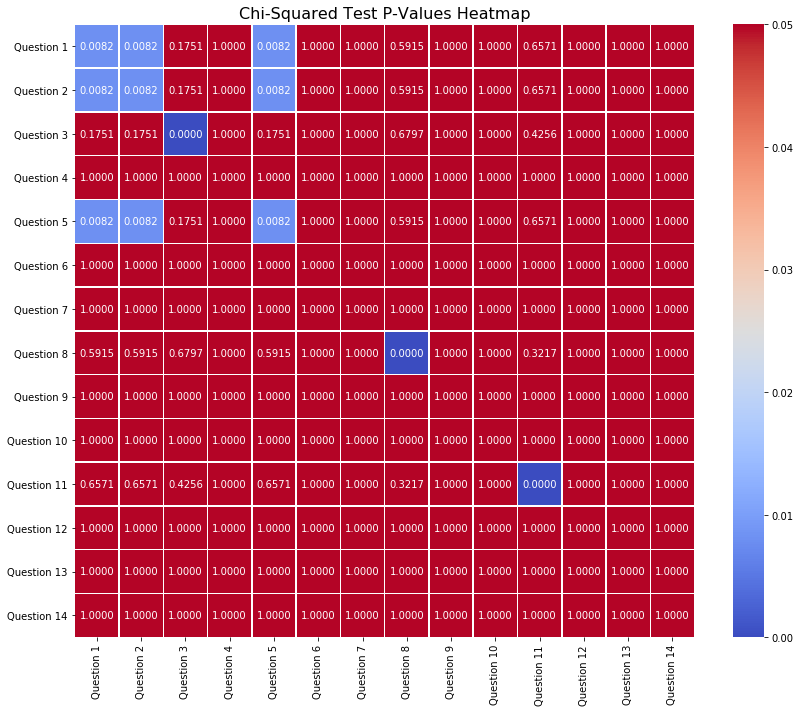

In [60]:
# Generate the row and column names for the heatmap
row_names = ['Question ' + str(i) for i in range(1, 15)]
column_names = ['Question ' + str(j) for j in range(1, 15)]

# Create a DataFrame from the p_values_matrix with row and column names
p_values_df = pd.DataFrame(p_values_matrix, index=row_names, columns=column_names)

# Set up the plot
plt.figure(figsize=(12, 10))
plt.title("Chi-Squared Test P-Values Heatmap", fontsize=16)

# Create the heatmap
sns.heatmap(p_values_df, annot=True, cmap='coolwarm', fmt=".4f", linewidths=0.5, vmin=0, vmax=0.05)

# Show the plot

plt.tight_layout()
plt.savefig("Chi-squared1.pdf")
plt.show()

In [193]:
selected_columns = ['Q1', 'Q2', 'Q3', 'Q5', 'Q8', 'Q11']
df_selected = df[selected_columns].copy()

# Convert selected columns to 'category' data type
for column in selected_columns:
    df_selected[column] = df_selected[column].astype('category')
    
    
contingency_table = pd.crosstab(df_selected['Q2'], df_selected['Q5'])

print(contingency_table)

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(chi2, p_value, dof, expected)

n = contingency_table.sum().sum()
k = contingency_table.shape[1]
r = contingency_table.shape[0]
cramers_v = np.sqrt(chi2 / (n * min(k-1, r-1)))

print(cramers_v)


Q5          Scenario 1  Scenario 2
Q2                                
Scenario 1           1           0
Scenario 2          28           1
6.991676575505352 0.008188961276439782 1 [[ 0.96666667  0.03333333]
 [28.03333333  0.96666667]]
0.4827586206896552


## Results chi quared test Q11 vs demographic variables


In [54]:
# Read the CSV file
url = 'https://raw.githubusercontent.com/iatecookies/BachelorThesis/main/survey.csv'
df = pd.read_csv(filepath_or_buffer=url, header=0, index_col=0)

# PREPROCESSING

# Remove the first two rows
df = df.iloc[3:]

# index of dataframe represents a start date. Replaced with sequantial numeric index
df.reset_index(drop=True, inplace=True)

df.head()

data_types = df.dtypes
#print(data_types)

In [55]:
# Assuming your DataFrame is named 'df'
selected_columns = ['Q11', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21']
df_selected = df[selected_columns].copy()

# Convert selected columns to 'category' data type
for column in selected_columns:
    df_selected[column] = df_selected[column].astype('category')

    
print(df_selected)

           Q11     Q15              Q16  \
0   Scenario 1    Male  35-44 years old   
1   Scenario 1    Male  35-44 years old   
2   Scenario 1  Female  25-34 years old   
3   Scenario 1  Female  18-24 years old   
4   Scenario 2    Male  18-24 years old   
5   Scenario 1    Male  25-34 years old   
6   Scenario 1    Male  18-24 years old   
7   Scenario 1    Male  35-44 years old   
8   Scenario 2  Female  18-24 years old   
9   Scenario 1    Male  35-44 years old   
10  Scenario 1    Male  35-44 years old   
11  Scenario 2    Male  18-24 years old   
12  Scenario 2    Male  35-44 years old   
13  Scenario 2    Male  55-64 years old   
14  Scenario 1  Female  25-34 years old   
15  Scenario 1  Female  35-44 years old   
16  Scenario 1    Male  18-24 years old   
17  Scenario 2    Male  18-24 years old   
18  Scenario 2  Female  18-24 years old   
19  Scenario 1  Female  25-34 years old   
20  Scenario 1    Male  25-34 years old   
21  Scenario 1  Female  18-24 years old   
22  Scenari

You can repeat the above step for each demographic variable to obtain separate contingency tables for each comparison.

Perform the statistical test: Choose either the Chi-Square test or Fisher's exact test based on your sample size and the assumptions being met.
For Chi-Square test:

In [56]:
#DOING THIS MANUALLY

print(df_selected['Q11'])

contingency_table = pd.crosstab(df_selected['Q11'], df_selected['Q11'])

print(contingency_table)
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(chi2, p_value, dof, expected)

alpha = 0.05

print("P-value:", p_value)

if p_value <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
    
    
# Fisher's exact test



0     Scenario 1
1     Scenario 1
2     Scenario 1
3     Scenario 1
4     Scenario 2
5     Scenario 1
6     Scenario 1
7     Scenario 1
8     Scenario 2
9     Scenario 1
10    Scenario 1
11    Scenario 2
12    Scenario 2
13    Scenario 2
14    Scenario 1
15    Scenario 1
16    Scenario 1
17    Scenario 2
18    Scenario 2
19    Scenario 1
20    Scenario 1
21    Scenario 1
22    Scenario 1
23    Scenario 1
24    Scenario 1
25    Scenario 1
26    Scenario 1
27    Scenario 2
28    Scenario 1
29    Scenario 2
Name: Q11, dtype: category
Categories (2, object): [Scenario 1, Scenario 2]
Q11         Scenario 1  Scenario 2
Q11                               
Scenario 1          21           0
Scenario 2           0           9
25.427059712774 4.594283903196696e-07 1 [[14.7  6.3]
 [ 6.3  2.7]]
P-value: 4.594283903196696e-07
Dependent (reject H0)


## For Fisher's exact test:

In [7]:
selected_columns = ['Q1', 'Q2', 'Q5', 'Q3', 'Q8', 'Q11']
df_selected = df[selected_columns].copy()

print(df_selected )
# Convert selected columns to 'category' data type
for column in selected_columns:
    df_selected[column] = df_selected[column].astype('category')


# Compare Question 1 (Q1) with Question 2 (Q2)
contingency_table_1_2 = pd.crosstab(df_selected['Q1'], df_selected['Q2'])
odds_ratio_1_2, p_value_1_2 = fisher_exact(contingency_table_1_2)



alpha = 0.05

print("Q1 vs Q2:")
print(contingency_table_1_2)
print("Odds Ratio:", odds_ratio_1_2)
print("P-value:", p_value_1_2)
if p_value_1_2 <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
print()

# Compare Question 1 (Q1) with Question 5 (Q5)
contingency_table_1_5 = pd.crosstab(df_selected['Q1'], df_selected['Q5'])
odds_ratio_1_5, p_value_1_5 = fisher_exact(contingency_table_1_5)

print("Q1 vs Q5:")
print(contingency_table_1_5)
print("Odds Ratio:", odds_ratio_1_5)
print("P-value:", p_value_1_5)
if p_value_1_5 <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
print()



# Compare Question 2 (Q2) with Question 5 (Q5)
contingency_table_2_5 = pd.crosstab(df_selected['Q2'], df_selected['Q5'])
odds_ratio_2_5, p_value_2_5 = fisher_exact(contingency_table_2_5)

print("Q2 vs Q5:")
print(contingency_table_2_5)
print("Odds Ratio:", odds_ratio_2_5)
print("P-value:", p_value_2_5)
if p_value_2_5 <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
print()



# Compare Question 3 (Q3) with itself
contingency_table_3_3 = pd.crosstab(df_selected['Q3'], df_selected['Q3'])
odds_ratio_3_3, p_value_3_3 = fisher_exact(contingency_table_3_3)

print("Q3 vs Q3:")
print(contingency_table_3_3)
print("Odds Ratio:", odds_ratio_3_3)
print("P-value:", p_value_3_3)
if p_value_3_3 <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
print()


# Compare Question 8 (Q8) with itself
contingency_table_8_8 = pd.crosstab(df_selected['Q8'], df_selected['Q8'])
odds_ratio_8_8, p_value_8_8 = fisher_exact(contingency_table_8_8)


print("Q8 vs Q8:")
print(contingency_table_8_8)
print("Odds Ratio:", odds_ratio_8_8)
print("P-value:", p_value_8_8)
if p_value_8_8 <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
print()


# Compare Question 11 (Q11) with itself
contingency_table_11_11 = pd.crosstab(df_selected['Q11'], df_selected['Q11'])
odds_ratio_11_11, p_value_11_11 = fisher_exact(contingency_table_11_11)


print("Q11 vs Q11:")
print(contingency_table_11_11)
print("Odds Ratio:", odds_ratio_11_11)
print("P-value:", p_value_11_11)
if p_value_11_11 <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
print()


# Print or analyze the results as needed

            Q1          Q2          Q5          Q3          Q8         Q11
0   Scenario 1  Scenario 2  Scenario 1  Scenario 1  Scenario 2  Scenario 1
1   Scenario 1  Scenario 2  Scenario 1  Scenario 1  Scenario 2  Scenario 1
2   Scenario 1  Scenario 2  Scenario 1  Scenario 1  Scenario 2  Scenario 1
3   Scenario 1  Scenario 2  Scenario 1  Scenario 1  Scenario 2  Scenario 1
4   Scenario 1  Scenario 2  Scenario 1  Scenario 1  Scenario 2  Scenario 2
5   Scenario 1  Scenario 2  Scenario 1  Scenario 2  Scenario 2  Scenario 1
6   Scenario 1  Scenario 2  Scenario 1  Scenario 1  Scenario 2  Scenario 1
7   Scenario 1  Scenario 2  Scenario 1  Scenario 1  Scenario 2  Scenario 1
8   Scenario 1  Scenario 2  Scenario 1  Scenario 1  Scenario 1  Scenario 2
9   Scenario 1  Scenario 2  Scenario 1  Scenario 1  Scenario 1  Scenario 1
10  Scenario 1  Scenario 2  Scenario 1  Scenario 1  Scenario 2  Scenario 1
11  Scenario 1  Scenario 2  Scenario 1  Scenario 2  Scenario 2  Scenario 2
12  Scenario 1  Scenario 

Interpret the results: Inspect the p-values obtained from the tests. A small p-value (usually less than 0.05) suggests that there is a significant association between the two variables, indicating a relationship worth exploring further.

Repeat the steps for other demographic variables to compare them with Question 11.

Please note that the above code assumes that you have appropriately coded your categorical variables before performing the analysis. Make sure to check the assumptions and conditions for using each test, especially regarding sample size and expected cell frequencies for the Chi-Square test. Also, consider correcting for multiple comparisons if you are testing multiple demographic variables against Question 11.

## Correlation analysis

use correlation analysis to analyze whether age/gender/education level/… is correlated with participant choice in a certain condition

In [195]:
# Read the CSV file
url = 'https://raw.githubusercontent.com/iatecookies/BachelorThesis/main/survey.csv'
df = pd.read_csv(filepath_or_buffer=url, header=0, index_col=0)

# PREPROCESSING

# Remove the first two rows
df = df.iloc[3:]

# index of dataframe represents a start date. Replaced with sequantial numeric index
df.reset_index(drop=True, inplace=True)

df.head()

data_types = df.dtypes
#print(data_types)

In [158]:

columns_q1_to_q14 = df.iloc[:, 16:30]

#print(columns_q1_to_q14)

# Replace "Scenario 1" with 0 and "Scenario 2" with 1
columns_q1_to_q14_encoded = columns_q1_to_q14.replace({"Scenario 1": 0, "Scenario 2": 1})

# print(columns_q1_to_q14_encoded)
# print(columns_q1_to_q14_encoded.iloc[ :, 6:7].dtypes) example check if Q7 is actually num

# Map gender categories to numerical values
gender_mapping = {'Male': 0, 'Female': 1, 'Other': 2}  # Update with your gender categories if needed
df['Q15'] = df['Q15'].map(gender_mapping)

# Map age categories to numerical ranges
age_mapping = {'18-24 years old': 1, '25-34 years old': 2, '35-44 years old': 3, '45-54 years old': 4, '55-64 years old': 5, '65+ years old': 6}  
df['Q16'] = df['Q16'].map(age_mapping)

# Map education categories to numerical ranges
education_mapping = {"High school diploma or equivalent": 1, "Associate's degree or vocational certification": 2, "Bachelor's degree": 3, "Master's degree": 4, "Doctorate or professional degree": 5}  
df['Q19'] = df['Q19'].map(education_mapping)

# Calculate the correlations between age/gender/education and Q1 to Q14 using Spearman's rank correlation coefficient
correlations = pd.concat([columns_q1_to_q14_encoded, df['Q16'], df['Q15'], df['Q19']], axis=1).corr(method='spearman')

#print(correlations)
print()
print()

# Display the correlation matrix
print(correlations.loc['Q1':'Q14', ['Q16', 'Q15', 'Q19']])



          Q16       Q15       Q19
Q1  -0.193557 -0.173702 -0.266279
Q2  -0.318800 -0.198517  0.138928
Q3   0.027251 -0.311805  0.069273
Q4        NaN       NaN       NaN
Q5  -0.193557 -0.173702 -0.266279
Q6        NaN       NaN       NaN
Q7        NaN       NaN       NaN
Q8   0.004622  0.110801  0.249074
Q9        NaN       NaN       NaN
Q10       NaN       NaN       NaN
Q11 -0.169477 -0.174964 -0.036280
Q12       NaN       NaN       NaN
Q13       NaN       NaN       NaN
Q14       NaN       NaN       NaN


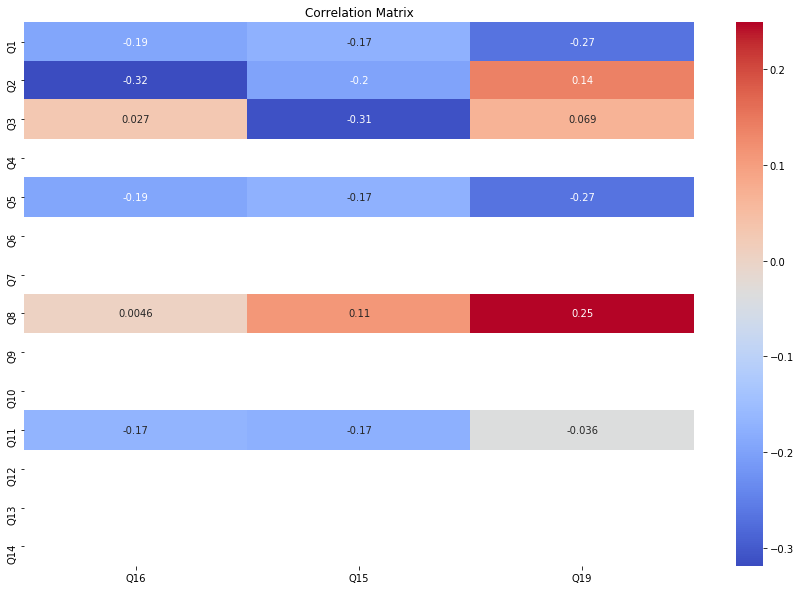

In [108]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(correlations.loc['Q1':'Q14', ['Q16', 'Q15', 'Q19']], annot=True, cmap='coolwarm')

# Set the title of the heatmap
plt.title('Correlation Matrix')

# Display the heatmap
plt.show()

In [198]:
columns_q1_to_q14 = df.iloc[:, 16:30]

#print(columns_q1_to_q14)

# Replace "Scenario 1" with 0 and "Scenario 2" with 1
columns_q1_to_q14_encoded = columns_q1_to_q14.replace({"Scenario 1": 0, "Scenario 2": 1})



print(df.iloc[:, 16:30])

# Calculate correlations
correlations = df[['Q3', 'Q8', 'Q11', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21']].corr()

# Print or visualize the correlation matrix
print(correlations)



     Q16  Q15  Q19
Q1   NaN  NaN  NaN
Q2   NaN  NaN  NaN
Q3   NaN  NaN  NaN
Q4   NaN  NaN  NaN
Q5   NaN  NaN  NaN
Q6   NaN  NaN  NaN
Q7   NaN  NaN  NaN
Q8   NaN  NaN  NaN
Q9   NaN  NaN  NaN
Q10  NaN  NaN  NaN
Q11  NaN  NaN  NaN
Q12  NaN  NaN  NaN
Q13  NaN  NaN  NaN
Q14  NaN  NaN  NaN


                      Q1        Q2        Q3        Q5        Q8       Q11
Gender         -0.173702 -0.198517 -0.311805 -0.173702  0.110801 -0.174964
Age            -0.168366 -0.483375 -0.009749 -0.168366 -0.048502 -0.082971
Living Area    -0.083045  0.083045 -0.149071 -0.083045 -0.134840 -0.097590
Education      -0.287298  0.099930  0.044845 -0.287298  0.248453 -0.058716
Employment      0.200200  0.081331 -0.258297  0.200200 -0.193005  0.117631
Transport mode -0.186561  0.031094  0.037210 -0.186561 -0.088351  0.012180


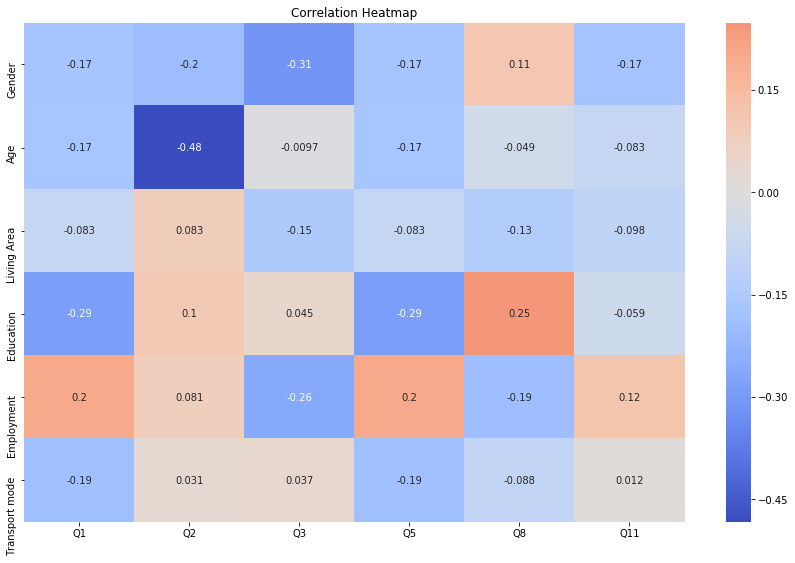

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
url = 'https://raw.githubusercontent.com/iatecookies/BachelorThesis/main/survey.csv'
df = pd.read_csv(filepath_or_buffer=url, header=0, index_col=0)

# PREPROCESSING
# Remove the first two rows
df = df.iloc[3:]

# index of the dataframe represents a start date. Replaced with a sequential numeric index
df.reset_index(drop=True, inplace=True)

# Convert the columns of interest to numeric type
df['Q1'] = df['Q1'].replace({"Scenario 1": 0, "Scenario 2": 1})
df['Q2'] = df['Q2'].replace({"Scenario 1": 0, "Scenario 2": 1})
df['Q3'] = df['Q3'].replace({"Scenario 1": 0, "Scenario 2": 1})
df['Q5'] = df['Q5'].replace({"Scenario 1": 0, "Scenario 2": 1})
df['Q8'] = df['Q8'].replace({"Scenario 1": 0, "Scenario 2": 1})
df['Q11'] = df['Q11'].replace({"Scenario 1": 0, "Scenario 2": 1})

# Map gender categories to numerical values
gender_mapping = {'Male': 0, 'Female': 1, 'Other': 2}
df['Gender'] = df['Q15'].map(gender_mapping)

# Map age categories to numerical ranges
age_mapping = {'18-24 years old': 1, '25-34 years old': 2, '35-44 years old': 3, '45-54 years old': 4, '55-64 years old': 5, '65+ years old': 6}  
df['Age'] = df['Q16'].map(age_mapping)

# Map Living area categories to numerical values
area_mapping = {'City': 0, 'Rural': 1}
df['Living Area'] = df['Q18'].map(area_mapping)

# Map education categories to numerical ranges
education_mapping = {"High school diploma or equivalent": 1, "Associate's degree or vocational certification": 2, "Bachelor's degree": 3, "Master's degree": 4, "Doctorate or professional degree": 5}  
df['Education'] = df['Q19'].map(education_mapping)

# Map employment categories to numerical values
employment_mapping = {'Working full-time': 0, 'Working part-time': 1, 'Unemployed and looking for work': 2, 'A homemaker or stay-at-home parent': 3, 'Student': 4, 'Retired': 5, 'Other': 6}
df['Employment'] = df['Q20'].map(employment_mapping)

# Map transport categories to numerical values
transport_mapping = {'Car': 0, 'Public transportation (bus, train, subway, etc)': 1, 'Bicycle': 2, 'Walking': 3, 'Other': 4}
df['Transport mode'] = df['Q21'].map(transport_mapping)

# List of scenario columns
scenario_columns = ['Q1', 'Q2','Q3', 'Q5', 'Q8', 'Q11']

# List of demographic columns
demographic_rows = ['Gender', 'Age', 'Living Area', 'Education', 'Employment', 'Transport mode']

# Calculate the correlation matrix
correlations = df[scenario_columns + demographic_rows].corr(method='pearson')

print(correlations.loc[demographic_rows, scenario_columns])

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlations.loc[demographic_rows, scenario_columns], annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig("correlation.pdf")
plt.show()


In [11]:
# Your correlation matrix
correlation_matrix = np.array([
    [-0.173702, -0.198517, -0.311805, -0.173702, 0.110801, -0.174964],
    [-0.168366, -0.483375, -0.009749, -0.168366, -0.048502, -0.082971],
    [-0.083045, 0.083045, -0.149071, -0.083045, -0.134840, -0.097590],
    [-0.287298, 0.099930, 0.044845, -0.287298, 0.248453, -0.058716],
    [0.200200, 0.081331, -0.258297, 0.200200, -0.193005, 0.117631],
    [-0.186561, 0.031094, 0.037210, -0.186561, -0.088351, 0.012180]
])

# Sample size
n = 30

# Calculate the t-statistic for each correlation coefficient
t_statistics = correlation_matrix * np.sqrt((n - 2) / (1 - correlation_matrix ** 2))

print(t_statistics)

[[-0.93333287 -1.07178448 -1.73648763 -0.93333287  0.58993625 -0.94032717]
 [-0.90381144 -2.92179683 -0.05158931 -0.90381144 -0.25695087 -0.44056033]
 [-0.44095599  0.44095599 -0.79772295 -0.44095599 -0.72008245 -0.51887448]
 [-1.5871504   0.53144     0.23753641 -1.5871504   1.35724762 -0.31123283]
 [ 1.08124865  0.43179367 -1.41478934  1.08124865 -1.04085689  0.62679636]
 [-1.00482943  0.16461358  0.19703326 -1.00482943 -0.46934497  0.06445528]]


In [12]:
from scipy.stats import t

alpha = 0.05
df = n-2
critical_t = t.ppf(1 - alpha/2, df)
print(critical_t)

2.048407141795244


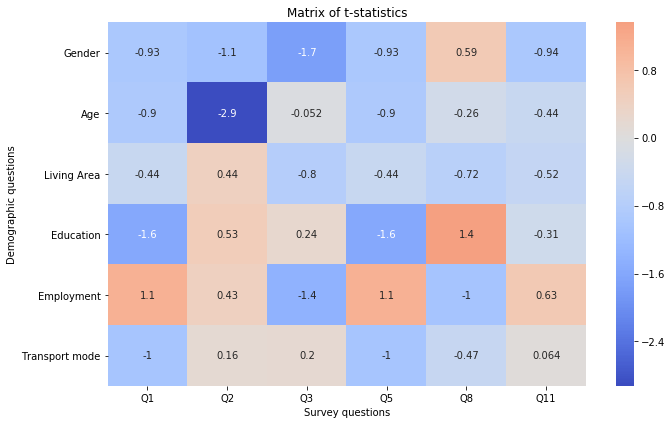

In [13]:
demographic_labels = ['Gender', 'Age', 'Living Area', 'Education', 'Employment', 'Transport mode']

# Correlation coefficient labels
correlation_labels = ['Q1', 'Q2', 'Q3', 'Q5', 'Q8', 'Q11']

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(t_statistics, annot=True, cmap='coolwarm', center=0,
            xticklabels=correlation_labels, yticklabels=demographic_labels)
plt.xlabel('Survey questions')
plt.ylabel('Demographic questions')
plt.title('Matrix of t-statistics')
plt.tight_layout()
plt.savefig("t-statistics.pdf")
plt.show()